In [1]:
# Jupyter Notebook with widget matplotlib plots
#%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
#%matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import sys
import cartopy
import pyicon as pyic
import matplotlib

Generate some example data

In [5]:
depth = np.linspace(0,6000,100)
lat = np.linspace(-90,90,180)

L, D = np.meshgrid(lat, depth)
data = np.cos(L*np.pi/180.)*np.cos(D/6000)

Example where pyicon is only used for splitting the axes:

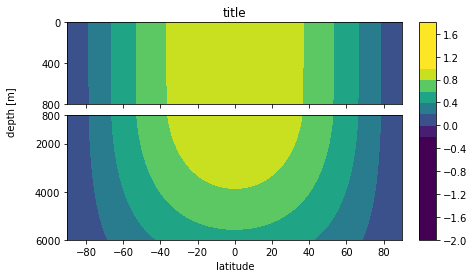

In [6]:
split_ax = True # switch between splitting axes (using pyicon) and not splitting axes (without pyicon)

# --- make figure and origional axes
fig = plt.figure()
ax = fig.add_subplot()

# --- add colorbar (similar to make_axes_locatable method, which cannot be used here)
pos_axes = ax.get_position()
pad = 0.05   # space between axes and colorbar
size = 0.05  # width of colorbar
pos_cb = [pos_axes.x0+pos_axes.width*(1+pad), pos_axes.y0, pos_axes.width*size, pos_axes.height]
cax = fig.add_subplot(label='cb')
cax.set_position(pos_cb)

# --- do contourf plot
if split_ax:
    ax = pyic.split_axes_vertically(ax, frac=0.4)
    for axsp in ax.axs:  # iterates over upper and lower axes
        Cf = axsp.contourf(lat, depth, data, np.arange(-2,2,0.2), vmin=-0.2, vmax=1)
else:
    Cf = ax.contourf(lat, depth, data, np.arange(-2,2,0.2), vmin=-0.2, vmax=1)
    
# --- fill colorbar
fig.colorbar(Cf, cax=cax)

# --- makes axes nice
ax.set_facecolor('0.7')
if split_ax:
    ax.set_ylim([6000, 800], [800, 0])
    ax.set_yticks([6000, 4000, 2000, 800], [800, 400, 0])
else:
    ax.set_ylim(6000, 0)
    ax.set_xlim(-90, 90)
ax.set_title('title')
ax.set_xlabel('latitude')
ax.set_ylabel('depth [m]')

Example with using pyicon also for generating axes and plotting:

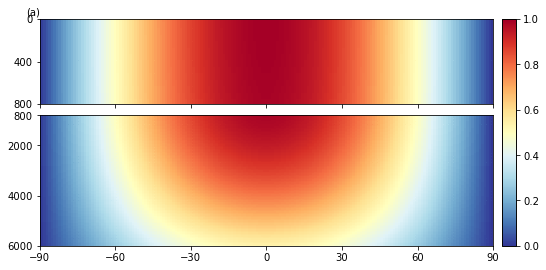

In [7]:
split_ax = True # switch between splitting axes (using pyicon) and not splitting axes (without pyicon)

# --- generate axes
hca, hcb = pyic.arrange_axes(1, 1, asp=0.5, fig_size_fac=2, plot_cb=True, 
                             sharex=True, sharey=True,
                            )
ii=-1

# --- do plot
ii+=1; ax=hca[ii]; cax=hcb[ii]
if split_ax:
    ax = pyic.split_axes_vertically(ax)
    hca[ii] = ax # exchange old with new axes object
    for axsp in ax.axs:
        pyic.shade(lat, depth, data, ax=axsp, cax=cax, clim=[0,1])
else:
    pyic.shade(lat, depth, data, ax=ax, cax=cax, clim=[0,1])

for ax in hca:
    ax.set_facecolor('0.7')
    if split_ax:
        ax.set_ylim([6000, 800], [800, 0])
        ax.set_yticks([6000, 4000, 2000, 800], [800, 400, 0])
    else:
        ax.set_ylim(6000,0)
        ax.set_yticks([6000,4000,2000])
    ax.set_xticks(np.arange(-90,100,30))